In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('ML+01+Logistic+Regession+Dataset+1.csv')

In [3]:
df.sample(5)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
2274,2275,50,technician,married,tertiary,0,0,0,1,cellular,6,jul,1,85,7,failure,13:47:02,13:51:19,0
909,910,44,services,married,primary,0,1161,1,0,NaN,19,may,5,-1,0,NaN,15:52:59,15:54:49,0
2758,2759,30,management,single,tertiary,0,5074,1,0,cellular,25,jul,2,-1,0,NaN,13:43:04,13:45:37,0
3902,3903,56,entrepreneur,divorced,primary,0,3,0,0,NaN,20,jun,1,-1,0,NaN,11:23:50,11:25:41,0
1771,1772,48,unemployed,married,secondary,0,926,0,0,cellular,15,feb,4,185,6,success,11:54:50,12:01:12,1


In [4]:
df.shape

(4000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [6]:
df.nunique()

Id                  4000
Age                   70
Job                   11
Marital                3
Education              3
Default                2
Balance             2178
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           330
PrevAttempts          20
Outcome                3
CallStart           3777
CallEnd             3764
CarInsurance           2
dtype: int64

In [7]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
((df.isnull().sum())/len(df))*100
# or in place of len(df) we can also use df.shape[0]

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

In [10]:
# if null values are greter than 30% -- drop the column
# if null values are less than 30% -- fill the null values
# if null balues is less than 5% -- drop the row
#  suppose if correlation between outcome and carinsurance is 70% than also we have to drop 

In [11]:
df.drop(['Outcome'],axis=1,inplace=True)

In [12]:
df.corr()['CarInsurance']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6952\1823427512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['CarInsurance']


Id               -0.017864
Age               0.039158
Default          -0.039506
Balance           0.041561
HHInsurance      -0.203419
CarLoan          -0.092131
LastContactDay   -0.061271
NoOfContacts     -0.114884
DaysPassed        0.138943
PrevAttempts      0.148763
CarInsurance      1.000000
Name: CarInsurance, dtype: float64

In [13]:
# double squre bracket are used to print as a dataset. here, df[['job','Age']] will give output
# but df['Job'] will print job column as a series and other column can't be print in same code e.g., df['job','Age']
df[['Job']]

,Job
0,management
1,blue-collar
2,management
3,student
4,management
...,...
3995,technician
3996,admin.
3997,admin.
3998,entrepreneur


In [14]:
df['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [15]:
df['Job'].mode()

0    management
Name: Job, dtype: object

In [16]:
# here [0] is used after mode to remove index of output as above code shows
df['Job']= df['Job'].fillna(df['Job'].mode()[0])

In [17]:
df['Education'].value_counts()

secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64

In [18]:
df.groupby(['Education'])['Age'].mean()

Education
primary      47.438503
secondary    40.199698
tertiary     39.724649
Name: Age, dtype: float64

In [19]:
df['Education'] =np.where((df['Education'].isnull()) & (df['Age']>=47),'primary',df['Education'])
df['Education'] =np.where((df['Education'].isnull()) & (df['Age']>=40),'secondary',df['Education'])
df['Education'] =np.where((df['Education'].isnull()) & (df['Age']<40),'tertiary',df['Education'])

In [20]:
df['Education'].isnull().sum()

0

In [21]:
df['Education'].value_counts()

secondary    2024
tertiary     1350
primary       626
Name: Education, dtype: int64

In [22]:
df.isnull().sum()

Id                    0
Age                   0
Job                   0
Marital               0
Education             0
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       902
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
CallStart             0
CallEnd               0
CarInsurance          0
dtype: int64

In [23]:
df['Communication'].value_counts()

cellular     2831
telephone     267
Name: Communication, dtype: int64

In [24]:
df.groupby(['Communication'])['NoOfContacts'].mean()

Communication
cellular     2.489933
telephone    3.498127
Name: NoOfContacts, dtype: float64

In [25]:
df.groupby(['Communication'])['Balance'].mean()

Communication
cellular     1576.931826
telephone    2156.116105
Name: Balance, dtype: float64

In [26]:
df['Communication']= df['Communication'].fillna('telephone')

In [27]:
df['CallEnd']=pd.to_datetime(df['CallEnd'],errors='coerce')

In [28]:
df['CallStart']=pd.to_datetime(df['CallStart'],errors='coerce')

In [29]:
df['Duration'] = df['CallEnd'] - df['CallStart']

In [30]:
# to fetch month
df['CallEnd'].dt.month

0       11
1       11
2       11
3       11
4       11
        ..
3995    11
3996    11
3997    11
3998    11
3999    11
Name: CallEnd, Length: 4000, dtype: int64

In [31]:
# to fetch hour
df['CallEnd'].dt.hour

0       13
1       14
2       16
3       12
4       14
        ..
3995    17
3996    14
3997    12
3998    11
3999    13
Name: CallEnd, Length: 4000, dtype: int64

In [32]:
# to fetch 
df['CallEnd'].dt.minute

0       46
1       52
2       36
3       20
4       38
        ..
3995    50
3996    51
3997    23
3998    29
3999    36
Name: CallEnd, Length: 4000, dtype: int64

In [33]:
df.head(2)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,Duration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,2023-11-04 13:45:20,2023-11-04 13:46:30,0,0 days 00:01:10
1,2,32,blue-collar,married,primary,0,1156,1,0,telephone,26,may,5,-1,0,2023-11-04 14:49:03,2023-11-04 14:52:08,0,0 days 00:03:05


In [34]:
df['duration_in_seconds'] =(df['CallEnd']-df['CallStart']).dt.total_seconds()
#Df['duration']=(df['CallEnd'].dt.minute-df['Callstart'].dt.minute*60) +(df['CallEnd'].dt.second-df['Callstart'].dt.second)

In [35]:
df.drop(['Duration'],axis=1,inplace=True)

In [36]:
df.drop(['CallStart'],axis=1,inplace=True)

In [37]:
df.drop(['CallEnd'],axis=1,inplace=True)

In [38]:
df.corr()['CarInsurance']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6952\1823427512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['CarInsurance']


Id                    -0.017864
Age                    0.039158
Default               -0.039506
Balance                0.041561
HHInsurance           -0.203419
CarLoan               -0.092131
LastContactDay        -0.061271
NoOfContacts          -0.114884
DaysPassed             0.138943
PrevAttempts           0.148763
CarInsurance           1.000000
duration_in_seconds    0.480346
Name: CarInsurance, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

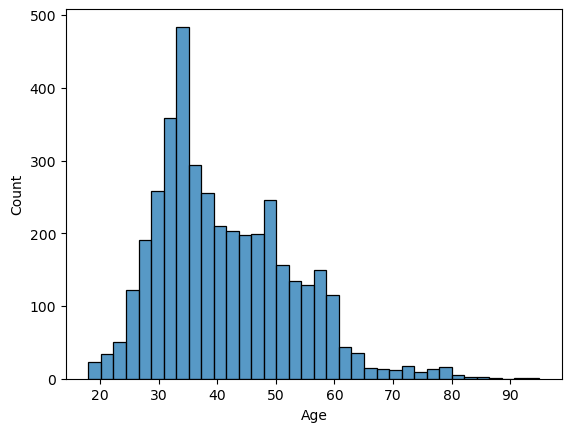

In [39]:
sns.histplot(df['Age'])

<Axes: xlabel='Balance', ylabel='Count'>

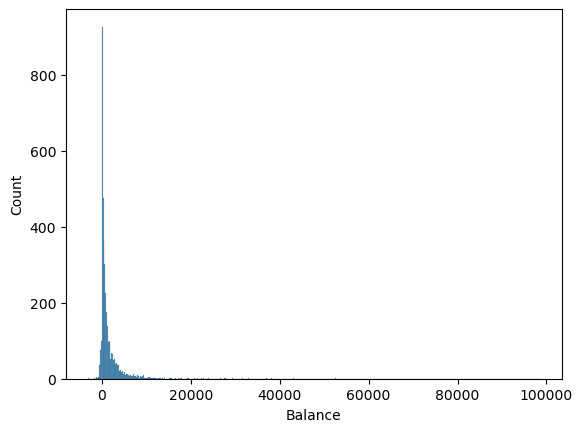

In [40]:
sns.histplot(df['Balance'])

<Axes: >

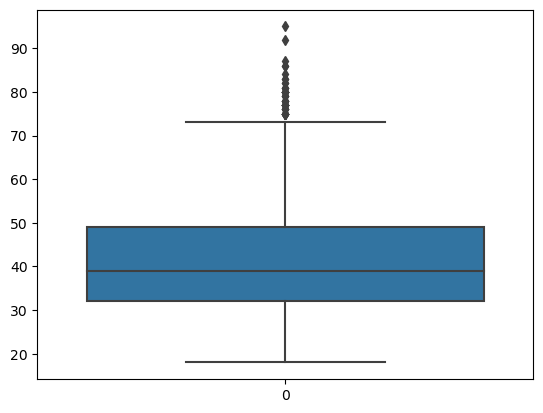

In [41]:
sns.boxplot(df['Age'])

<Axes: >

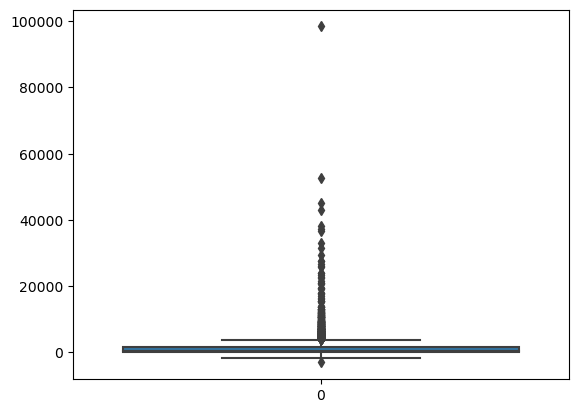

In [42]:
sns.boxplot(df['Balance'])

In [43]:
df['Age'].describe()

count    4000.000000
mean       41.214750
std        11.550194
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: Age, dtype: float64

In [44]:
df['Age'].value_counts()

31    182
32    177
33    164
34    163
35    157
     ... 
86      2
87      1
84      1
92      1
95      1
Name: Age, Length: 70, dtype: int64

In [45]:
df['Age'] =pd.cut(df['Age'],bins=[15,30,45,60,100],labels=['Young','Adult','Senior','Old'])

In [46]:
df['Balance'].describe()

count     4000.000000
mean      1532.937250
std       3511.452489
min      -3058.000000
25%        111.000000
50%        551.500000
75%       1619.000000
max      98417.000000
Name: Balance, dtype: float64

In [47]:
df['Balance'] =pd.cut(df['Balance'],bins=[-4000,0,5000,100000],labels=['negative','mid','high'])

In [48]:
df['DaysPassed'].value_counts()
# bin-negative in past positive in present

-1      3042
 92       38
 182      33
 183      24
 91       24
        ... 
 212       1
 226       1
 76        1
 388       1
 40        1
Name: DaysPassed, Length: 330, dtype: int64

In [49]:
df['DaysPassed'].describe()

count    4000.000000
mean       48.706500
std       106.685385
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       854.000000
Name: DaysPassed, dtype: float64

In [50]:
df['DaysPassed'] =pd.cut(df['DaysPassed'],bins=[-2,-1,900],labels=['past','present'])

In [51]:
df['PrevAttempts'].value_counts()
# bin- o in o and greater than o into 1

0     3042
1      335
2      251
3      125
4       79
5       60
6       25
7       21
8       18
10      10
9        9
12       5
14       5
13       4
19       4
11       3
30       1
23       1
18       1
58       1
Name: PrevAttempts, dtype: int64

In [52]:
df['PrevAttempts'].describe()

count    4000.000000
mean        0.717500
std         2.078647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.000000
Name: PrevAttempts, dtype: float64

In [53]:
df['PrevAttempts'] =pd.cut(df['PrevAttempts'],bins=[-1,0,60],labels=[0,1])

In [54]:
df['NoOfContacts'].value_counts()

1     1685
2     1085
3      516
4      237
5      166
6       88
7       49
8       41
9       20
10      18
11      15
17      11
12      11
13       8
14       7
25       4
20       4
21       4
22       3
23       3
15       3
19       3
16       3
24       3
18       3
43       1
41       1
30       1
38       1
28       1
29       1
32       1
26       1
34       1
27       1
Name: NoOfContacts, dtype: int64

In [55]:
df['NoOfContacts'].describe()

count    4000.000000
mean        2.607250
std         3.064204
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        43.000000
Name: NoOfContacts, dtype: float64

In [56]:
df['NoOfContacts'] =pd.cut(df['NoOfContacts'],bins=[-1,1,3,45],labels=['normal','mid','high'])

In [57]:
df['Job'].value_counts()

management       912
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [58]:
#self-employed=entrepreneur, management=admin, student=unemployed=retired, housemaid = services,technician=blue-collar

In [59]:
df['Job']=df['Job'].replace({'entrepreneur':'self-employed','admin.':'management','student':'not-working',
                           'retired':'not-working','unemployed':'not-working',
                             'housemaid':'services','technician':'blue-collar'})

In [60]:
df['Job'].value_counts()

blue-collar      1419
management       1371
not-working       510
services          439
self-employed     261
Name: Job, dtype: int64

In [61]:
df.dtypes

Id                        int64
Age                    category
Job                      object
Marital                  object
Education                object
Default                   int64
Balance                category
HHInsurance               int64
CarLoan                   int64
Communication            object
LastContactDay            int64
LastContactMonth         object
NoOfContacts           category
DaysPassed             category
PrevAttempts           category
CarInsurance              int64
duration_in_seconds     float64
dtype: object

In [62]:
df['PrevAttempts']=df['PrevAttempts'].astype('int')

In [63]:
df.drop(['LastContactMonth'],axis=1,inplace=True)
df.drop(['LastContactDay'],axis=1,inplace=True)

In [64]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6952\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,Default,HHInsurance,CarLoan,PrevAttempts,CarInsurance,duration_in_seconds
Id,1.000000,0.003334,0.004419,-0.003026,0.001447,-0.017864,-0.017702
Default,0.003334,1.000000,-0.014974,0.124936,-0.048469,-0.039506,0.002170
HHInsurance,0.004419,-0.014974,1.000000,0.088145,0.011653,-0.203419,0.020984
CarLoan,-0.003026,0.124936,0.088145,1.000000,-0.057641,-0.092131,0.042104
PrevAttempts,0.001447,-0.048469,0.011653,-0.057641,1.000000,0.208977,-0.033480
CarInsurance,-0.017864,-0.039506,-0.203419,-0.092131,0.208977,1.000000,0.480346
duration_in_seconds,-0.017702,0.002170,0.020984,0.042104,-0.033480,0.480346,1.000000


In [65]:
df_num= df.select_dtypes(include=['number'])
df_cat= df.select_dtypes(exclude=['number'])

In [66]:
df_dummies=pd.get_dummies(df_cat,drop_first= True)

In [67]:
df_new=pd.concat([df_num,df_dummies],axis=1)

In [68]:
pd.set_option('display.max_columns',None)
df_new.head(2)

,Id,Default,HHInsurance,CarLoan,PrevAttempts,CarInsurance,duration_in_seconds,Age_Adult,Age_Senior,Age_Old,Job_management,Job_not-working,Job_self-employed,Job_services,Marital_married,Marital_single,Education_secondary,Education_tertiary,Balance_mid,Balance_high,Communication_telephone,NoOfContacts_mid,NoOfContacts_high,DaysPassed_present
0,1,0,1,0,0,0,70.0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0
1,2,0,1,0,0,0,185.0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [69]:
x= df_new.drop(['CarInsurance'],axis=1)
type(x)

pandas.core.frame.DataFrame

In [70]:
y=df_new['CarInsurance']
y.head(2)
type(y)

pandas.core.series.Series

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=5) 
# stratified sampling = true for imbalanced data

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score, classification_report, precision_score, recall_score,confusion_matrix

In [97]:
logreg=LogisticRegression()

In [98]:
print(y_train.shape)

(3200,)


In [99]:
logreg.fit(x_train,y_train)

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [109]:
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score,roc_curve
from math import sqrt
mse =mean_squared_error(y_test,y_pred)
rmse =sqrt(mean_squared_error(y_test,y_pred))
r_squared= r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(r_squared)

0.18875
0.4344536799245692
0.21016842765979715


In [102]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
#random state=42 accuracy 80 stored

Accuracy: 0.81


In [103]:
f1=f1_score(y_test,y_pred)
recoll=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
confusionmetrix=confusion_matrix(y_test,y_pred)
print(f1)
print(recoll)
print(precision)
print(confusionmetrix)

0.7583999999999999
0.75
0.7669902912621359
[[412  72]
 [ 79 237]]


In [85]:
(407+232)/(407+77+84+232)

0.79875

In [80]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       484
           1       0.75      0.73      0.74       316

    accuracy                           0.80       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.80      0.80      0.80       800



In [84]:
#from plotly.express as px
#px.scatter(df,x='Balance',y='Age',size='CarInsurance')
#px.histogram

In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       4000 non-null   int64  
 1   Default                  4000 non-null   int64  
 2   HHInsurance              4000 non-null   int64  
 3   CarLoan                  4000 non-null   int64  
 4   PrevAttempts             4000 non-null   int32  
 5   CarInsurance             4000 non-null   int64  
 6   duration_in_seconds      4000 non-null   float64
 7   Age_Adult                4000 non-null   uint8  
 8   Age_Senior               4000 non-null   uint8  
 9   Age_Old                  4000 non-null   uint8  
 10  Job_management           4000 non-null   uint8  
 11  Job_not-working          4000 non-null   uint8  
 12  Job_self-employed        4000 non-null   uint8  
 13  Job_services             4000 non-null   uint8  
 14  Marital_married         

In [105]:
kf =KFold(n_splits=5)
score =cross_val_score(logreg,x_train,y_train,cv=kf)
score

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

array([0.7859375, 0.834375 , 0.8046875, 0.7921875, 0.803125 ])

In [106]:
score.mean()

0.8040624999999999

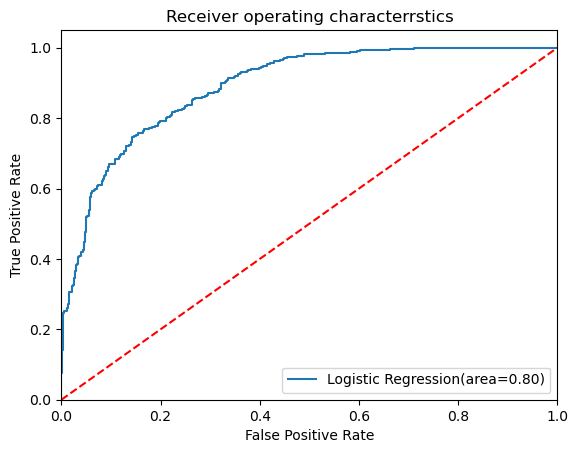

In [110]:
logit_roc_auc =roc_auc_score(y_test,logreg.predict(x_test))
fpr,tpr,thresholds =roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterrstics')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV
params =[{'C':[0.001,0.01,0.1,0.15,0.02,0.03]}]
clf =GridSearchCV(logreg,params)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

{'C': 0.1}
0.8012499999999999


C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.model_selection import RandomizedSearchCV
Rlf =RandomizedSearchCV(logreg,params)
Rlf.fit(x_train,y_train)
print(Rlf.best_params_)
print(Rlf.best_score_)

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

{'C': 0.1}
0.8012499999999999


C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
df.head()

In [ ]:
#homework
# convert numerical to categorical
# job - 10 unique but convert into four unique value using repalce
# convert all the categorical column into the numerical column
# multicollinearity -remove by vif

In [ ]:
#next class
#train test split
#logistic regression-train and predict
#model evaluate
#hyperparameter tunning
#cross validation